# BISI CST2101 Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Q1: Import the necessary libraries and briefly explain the use of each library (1 Mark)

In [1]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

#### Write your Answer here: 

### Q2: Read the given dataset (1 Mark)

In [2]:
pima = pd.read_csv("diabetes.csv")

### Q3. Show the last 5 records of the dataset (1 Mark)

In [3]:
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,2,173,79,32,474,35.504233,0.402867,21,1
996,13,132,70,30,111,35.271769,0.168845,42,1
997,3,132,87,44,156,34.794755,0.765003,29,1
998,0,140,0,0,0,41.926693,0.209833,28,1
999,4,93,59,35,93,45.914499,0.737636,29,1


### Q4. Show the first 5 records of the dataset (1 Mark)

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q5. Find the dimension of the `pima` dataframe. What do you understand by the dimension of the dataset? (1 Mark)

In [5]:
pima.shape

(1000, 9)

#### Write your Answer here: 


### Q6. Find the size of the `pima` dataframe. (1 Mark)

In [6]:
pima.size

9000

#### Write your Answer here: 


### Q7. Display the data types of all the variables in the data set? (1 Mark)


In [7]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Q8. Are there any missing values in the `pima` dataframe?  Which variables have missing values? (1 Mark)

In [8]:
pima.isnull().values.any()

False

In [9]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Write your Answer here: 


### Q9. Find the summary statistics for all variables except for  `'Outcome'` variable? Choose any one column/variable and explain all the statistical measures. (2 Marks)

In [10]:
pima.iloc[:,0:7].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000


In [11]:
pima.iloc[:, 4].head()

0      0
1      0
2      0
3     94
4    168
Name: Insulin, dtype: int64

#### Write your Answer here: 


### Q10. Plot the distribution plot for the variable `'BloodPressure'`. Write your observations from the plot. (2 Marks)

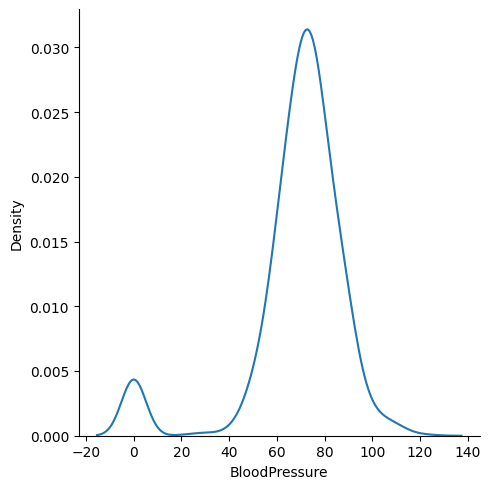

In [12]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

#### Write your Answer here: 


### Q11. What is the `'BMI'` for the person having the highest `'Glucose'`? (1 Mark)

In [13]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

#### Write your Answer here: 


### Q12.
#### 12.1 What is the mean of the variable `'BMI'`? 
#### 12.2 What is the median of the variable `'BMI'`? 
#### 12.3 What is the mode of the variable `'BMI'`?
#### 12.4 Are the three measures of central tendency equal?

### (2 Marks)

In [14]:
m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

32.664772391408796
32.8
32.0


#### Write your Answer here: 


### Q13. How many women's `'Glucose'` level is above the mean level of `'Glucose'`? (1 Mark)

In [15]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

#### Write your Answer here: 


### Q14. Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. Write you observations from the plot. (2 Marks)

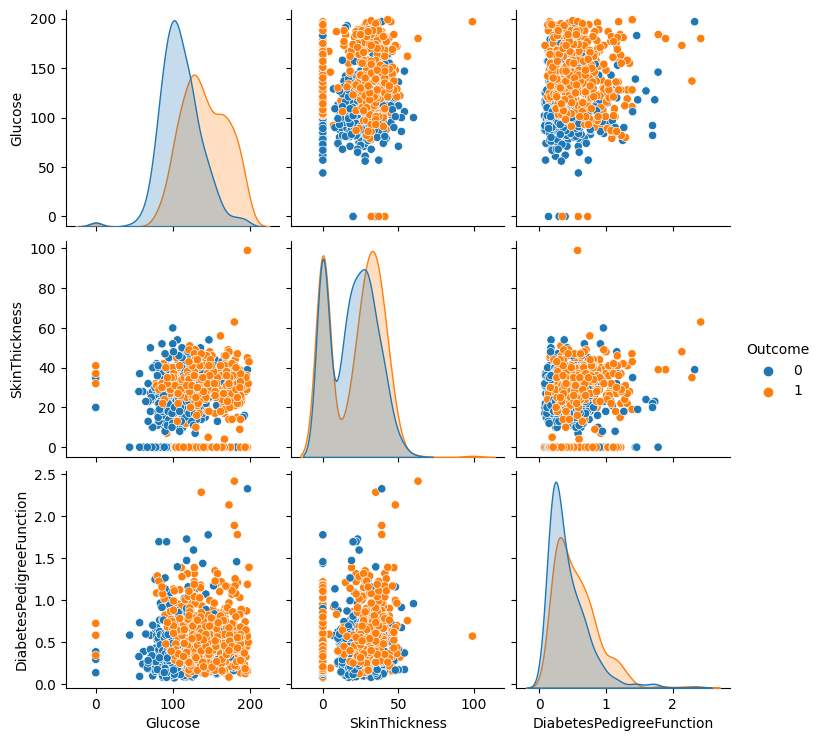

In [16]:
sns.pairplot(
    data=pima,
    vars=["Glucose", "SkinThickness", "DiabetesPedigreeFunction"],
    hue="Outcome",
)
plt.show()

#### Write your Answer here: 


### Q15. Plot the scatterplot between `'Glucose'` and `'Insulin'`. Write your observations from the plot. (1 Mark)

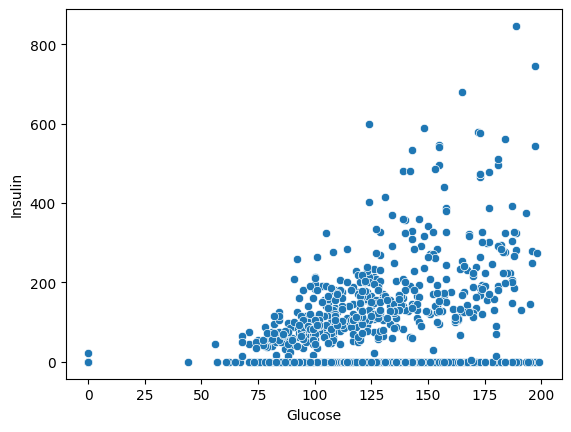

In [17]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

#### Write your Answer here: 


### Q16. Plot the boxplot for the 'Age' variable. Are there outliers? (1 Mark)

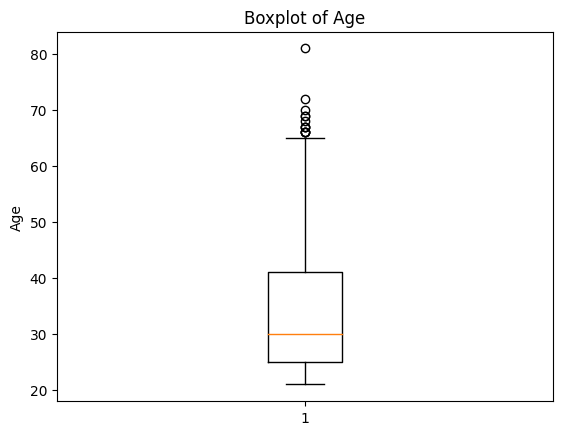

In [18]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Write your Answer here: 


### Q17. Find and visualize the the correlation matrix. Write your observations from the plot. (1 Mark)

In [19]:
corr_matrix = (pima.iloc[:,0:8].corr())

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


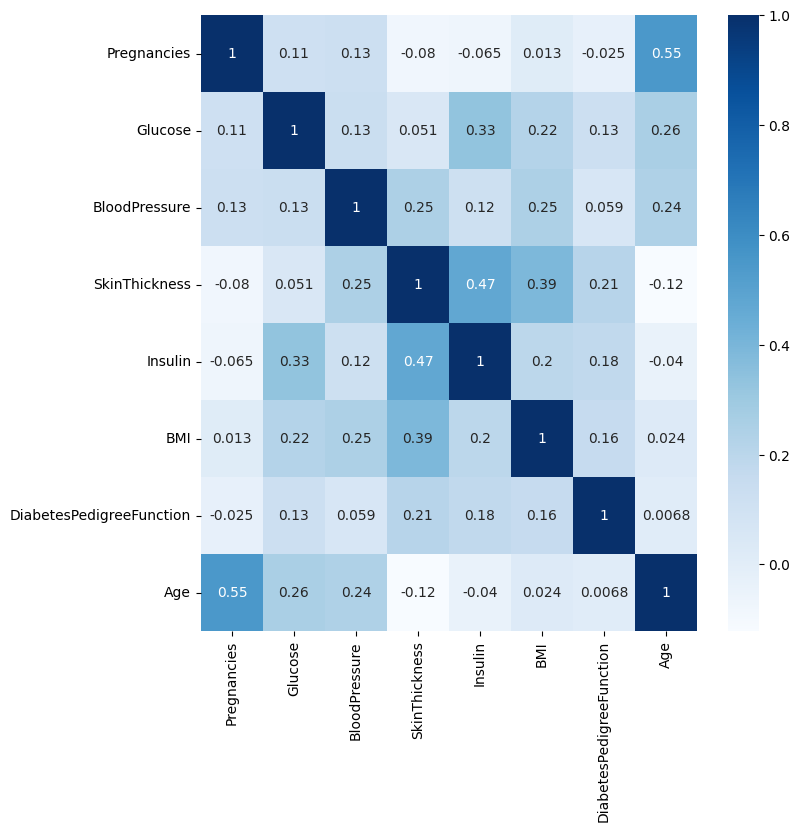

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')

# display the plot
plt.show()

#### Write your Answer here: 


## Model Training

### Q18. Split and scale the data (2 Mark)

In [21]:
# Split the data into dependent and independent variables
y = pima.Outcome
x = pima.drop("Outcome", axis=1)

In [22]:
# Using StandarScaler scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [23]:
# Splitting the data into train and test. Use test size as 15%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify=y,  random_state = 45)

### Q19. Train a Logistic Regression Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [24]:
# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# fit the model on the train set
m = lr.fit(x_train, y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy of Logistic Regression model on the train set: 0.76
Accuracy of the Logictic Regression model on the test set: 0.76


array([[63, 12],
       [24, 51]])

#### Write your Answer here: 


Ans 19:
The accuracy of the model is 76% and the number of True Positives and True Negatives are 51 and 63 respectively.

### Q20. Train a Random Forest Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [25]:
# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
confusion_matrix(y_test, y_pred2)

Accuracy of Random Forest model on the train set: 0.82
Accuracy of Random Forest model on the test set: 0.79


array([[56, 19],
       [13, 62]])

#### Write your Answer here: 

Ans 20:
The accuracy of the model is 78% and the number of True Positives and True Negatives are 60 and 57 respectively.

### Q21. Which model performed better? (1 Mark)

#### Write your Answer here: 

Ans 21:
Random forest model is better than Logistic Regression model as it has higher accuracy on both train and test set.
Random forest outperforms the precision of the Logistic Regression model, when predicting the positive class.